**Zadanie 1**  
Wczytaj pliki danych i scal je w jedną ramkę DataFrame.
Wykonaj analizę typów danych podobnie jak w przykładach.
Zmierz wielkość pamięci RAM ramki z domyślnymi typami danych.

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import glob

path = '../data/Lab01/*.parquet'
files = glob.glob(path)

df = pd.concat([pd.read_parquet(file) for file in files], ignore_index=True)
display(df.head())
df.info()

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
0,28370919,3496776,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80,0,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,travel_&_adventure
1,13623950,3496776,BeyPed5hKj9,2237947779,2018-02-04 19:35:20,1,The dirty south was prime today. Top day with ...,86,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
2,28370905,3496776,Bunhd1DFVAG,2237947779,2019-03-05 08:03:11,1,Tech Tuesday. Been flat out on the tools. Got ...,168,3,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,science_&_technology
3,28370907,3496776,Bppi85gliQK,2237947779,2018-11-01 20:17:41,1,"On the tools, my favourite wheel builds @stans...",102,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
4,32170690,3496776,BuDfIyslzfw,2237947779,2019-02-19 08:10:11,1,Solid effort on the bar turn.\nFully turned.\n...,145,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17210370 entries, 0 to 17210369
Data columns (total 17 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   sid                  int64 
 1   sid_profile          int64 
 2   post_id              object
 3   profile_id           int64 
 4   date                 object
 5   post_type            int64 
 6   description          object
 7   likes                int64 
 8   comments             int64 
 9   username             object
 10  bio                  object
 11  following            int64 
 12  followers            int64 
 13  num_posts            int64 
 14  is_business_account  bool  
 15  lang                 object
 16  category             object
dtypes: bool(1), int64(9), object(7)
memory usage: 2.1+ GB


In [2]:
def sizeof_fmt(num, suffix="B"):
    for unit in ("", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"):
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

In [3]:
sizeof_fmt(sum(df.memory_usage(deep=True)))

'18.5GiB'

In [4]:
for column in df.columns:
    print(f'{column}: {sizeof_fmt(df[column].memory_usage(deep=True))}')

sid: 131.3MiB
sid_profile: 131.3MiB
post_id: 984.6MiB
profile_id: 131.3MiB
date: 1.1GiB
post_type: 131.3MiB
description: 8.3GiB
likes: 131.3MiB
comments: 131.3MiB
username: 1015.0MiB
bio: 4.1GiB
following: 131.3MiB
followers: 131.3MiB
num_posts: 131.3MiB
is_business_account: 16.4MiB
lang: 837.1MiB
category: 1.1GiB


**Zadanie 2**  
Dobierz bardziej optymalne typy danych i ponownie zmierz wielkość zajmowanej pamięci RAM.
Porównaj obie wielkości na wykresie (wybierz pasujący typ wykresu).

In [5]:
pd.options.display.float_format = '{:.5f}'.format

In [6]:
df2 = pd.DataFrame()

In [7]:
df2['sid'] = df['sid'].astype(np.int32)
df2['sid_profile'] = df['sid_profile'].astype(np.int32)
df2['post_id'] = df['post_id']
df2['profile_id'] = df['profile_id']
df2['date'] = pd.to_datetime(df['date'])
df2['post_type'] = df['post_type'].astype('category')
df2['description'] = df['description']
df2['likes'] = df['likes'].astype(np.int32)
df2['comments'] = df['comments'].astype(np.int32)
df2['username'] = df['username']
df2['bio'] = df['bio']
df2['following'] = df['following'].astype(np.int32)
df2['followers'] = df['followers'].astype(np.int32)
df2['num_posts'] = df['num_posts'].astype(np.int32)
df2['is_business_account'] = df['is_business_account']
df2['lang'] = df['lang'].astype('category')
df2['category'] = df['category'].astype('category')

In [8]:
sizeof_fmt(sum(df2.memory_usage(deep=True)))

'15.1GiB'

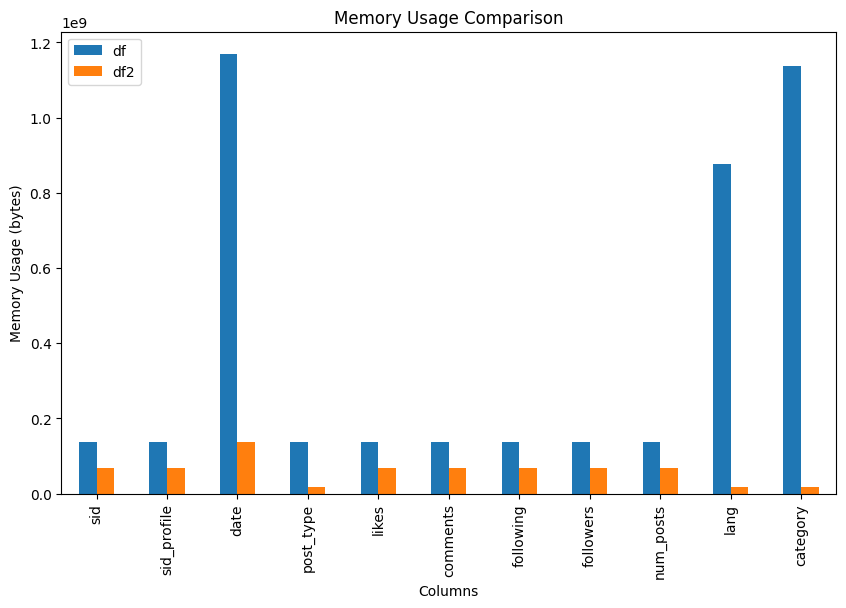

In [9]:
import matplotlib.pyplot as plt

df_memory = df.memory_usage(deep=True)
df2_memory = df2.memory_usage(deep=True)

memory_comparison = pd.DataFrame({
    'df': df_memory,
    'df2': df2_memory
})

optimized_columns = [
    'sid', 'sid_profile', 'date', 'post_type',
    'likes', 'comments', 'following', 
    'followers', 'num_posts', 'lang', 'category'
]

memory_comparison_filtered = memory_comparison.loc[optimized_columns]


memory_comparison_filtered.plot(kind='bar', figsize=(10, 6))
plt.title('Memory Usage Comparison')
plt.ylabel('Memory Usage (bytes)')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

**Zadanie 3**  
Wykonaj 3 wybrane operacje (grupowanie + agregacja, filtrowanie, itp.) na całej ramce i zmierz czas wykonania na danych oryginalnych i zoptymalizowanych.
Wyświetl te czasy.

In [10]:
start = datetime.now()
display(df.groupby(['category']).agg({'likes': ['mean']}).filter(df["post_type"] == 1))
print(f'Czas: {datetime.now() - start}')

category
arts_&_culture
business_&_entrepreneurs
celebrity_&_pop_culture
diaries_&_daily_life
family
fashion_&_style
film_tv_&_video
fitness_&_health
food_&_dining
gaming


Czas: 0:00:01.184084


In [11]:
start = datetime.now()
display(df2.groupby(['category']).agg({'likes': ['mean']}).filter(df["post_type"] == 1))
print(f'Czas: {datetime.now() - start}')

C:\Users\Arek\AppData\Local\Temp\ipykernel_1832\2513735584.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df2.groupby(['category']).agg({'likes': ['mean']}).filter(df["post_type"] == 1))


category
arts_&_culture
business_&_entrepreneurs
celebrity_&_pop_culture
diaries_&_daily_life
family
fashion_&_style
film_tv_&_video
fitness_&_health
food_&_dining
gaming


Czas: 0:00:00.601988


**Zadanie 4**  
Zapisz ramkę jako plik csv, z nagłówkami kolumn, bez indeksu.
Sprawdź jaka jest różnica w wielkości pliku csv i sumy wielkości plików w formacie parquet (w eksploratorze, nie trzeba tego robić z poziomu kodu).

In [12]:
df2.to_csv('data/private_instagram.csv', header=True, index=False)

parquet razem: 2,48 GB
csv: 6,05 GB

**Zadanie 5**  
Zmierz czas wczytywania danych z pliku csv dla 3 przypadków:
* cały plik na raz,
* cały plik ze wskazaniem parametru `chunksize` (możesz poeksperymentować z wielkością tego parametru),
* z użyciem multiprocessingu zaprezentowanego w przykładzie (wcześniej podziel plik na kilka mniejszych), wskazując ilość procesów jako `ilość_rdzeni - 2` oraz drugi przypadek `(ilosc_rdzeni - 2) * 2`.

In [13]:
def count_time(func):
    def wrapper(*args, **kwargs):
        start = datetime.now()
        func(*args, **kwargs)
        print(f"Czas wczytywania {func.__name__}: {datetime.now() - start} sekund")
        return func(*args, **kwargs)
    return wrapper

In [14]:
from itertools import repeat
from multiprocessing import Pool
import os

def apply_args_and_kwargs(func, args, kwargs):
    return func(*args, **kwargs)


def starmap_with_kwargs(pool, func, args_iter, kwargs_iter):
    args_for_starmap = zip(repeat(func), args_iter, kwargs_iter)
    return pool.starmap(apply_args_and_kwargs, args_for_starmap)

@count_time
def load_files(directory, processes):

    files = [[f"{directory}/{f}"] for f in os.listdir(directory) if f.endswith(".csv")]

    kwargs_list = [
        {
            'on_bad_lines': "skip",
        }
        for n in range(len(files))
    ]

    pool = Pool(processes=processes)
    args_iter = files

    results = starmap_with_kwargs(pool, pd.read_csv, args_iter, kwargs_list)
    results = pd.concat(results)

    return results

In [15]:
start = datetime.now()
df = pd.read_csv('data/zamowienia_expanded.csv', header=0)
print(f'Czas: {datetime.now() - start}')

Czas: 0:00:13.671280


In [16]:
start = datetime.now()
df2 = pd.read_csv('data/zamowienia_expanded.csv', header=0, chunksize=4_000_000)
print(f'Czas: {datetime.now() - start}')

Czas: 0:00:02.941575


In [ ]:
df3 = load_files('data/private_instagram_split', 12)

In [ ]:
df4 = load_files('data/private_instagram_split', 24)